<a href="https://colab.research.google.com/github/Harshavalmiki/SJSU-Data-Mining-255/blob/main/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-means** Clustering for Mall customers Dataset

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install matplotlib
!pip install seaborn

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Manual K-Means Clustering Function


In [ ]:
# K-means clustering implementation
def k_means_clustering(data, k, max_iterations=100):
    np.random.seed(42)  # For reproducibility
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in range(max_iterations):
        # Assign clusters
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_cluster = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([data[closest_cluster == k].mean(axis=0) for k in range(centroids.shape[0])])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, closest_cluster

### Load Dataset


In [55]:
dataset_file_path = '/content/drive/MyDrive/DM/mall.csv'

In [57]:
# Load the dataset
file_path = dataset_file_path  # Update the file path
data = pd.read_csv(file_path)

In [58]:
data.head()

,CustomerID,Gender,Age,ainc,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Select Relevant Features

In [59]:
# Selecting relevant features
features = data[['ainc',  'Age']]
features.fillna(0, inplace=True)  # Handling missing values

<ipython-input-59-6f8d638c3565>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)  # Handling missing values


### Standardize Features

In [60]:
# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Elbow Plot


In [62]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['ainc',  'Age']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

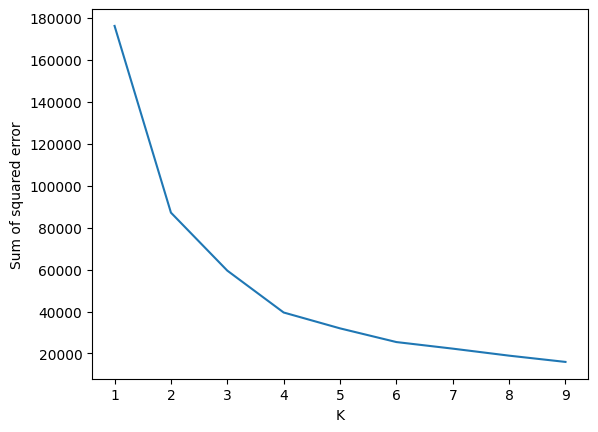

In [63]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### Apply K-means Clustering

In [66]:
# Applying K-means clustering
k = 2  # Number of clusters
centroids, clusters = k_means_clustering(features_scaled, k)

### Data Visualizations

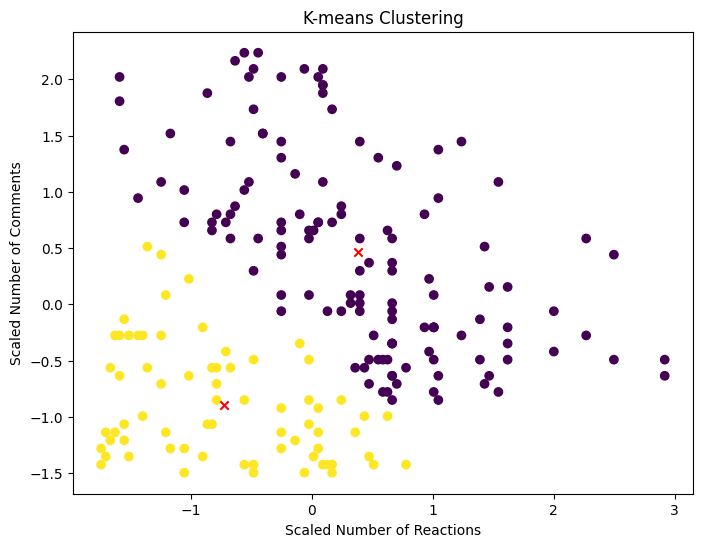

In [67]:
# Plotting (if desired and applicable)
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')  # Centroids
plt.title('K-means Clustering')
plt.xlabel('Scaled Number of Reactions')
plt.ylabel('Scaled Number of Comments')
plt.show()
